In [2]:
import seaborn as sns

In [3]:
anscombe = sns.load_dataset("anscombe")

In [4]:
anscombe.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


## Mathplotloib

In [5]:
import matplotlib.pyplot as plt

In [6]:
d_set1 = anscombe[anscombe['dataset'] == 'I']
d_set2 = anscombe[anscombe['dataset'] == 'II']
d_set3 = anscombe[anscombe['dataset'] == 'III']
d_set4 = anscombe[anscombe['dataset'] == 'IV']

## Plots

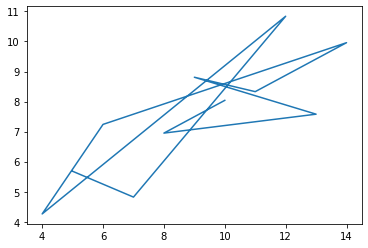

In [7]:
plt.plot(d_set1['x'], d_set1['y'])

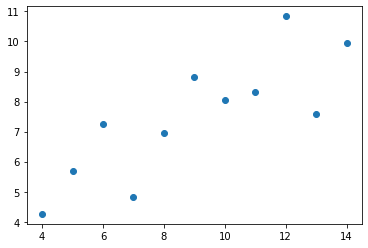

In [8]:
plt.plot(d_set1['x'], d_set1['y'], 'o')

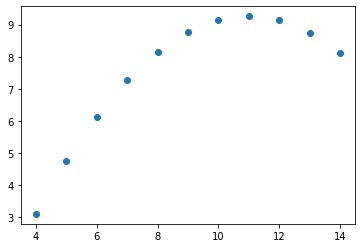

In [9]:
plt.plot(d_set2['x'], d_set2['y'], 'o')

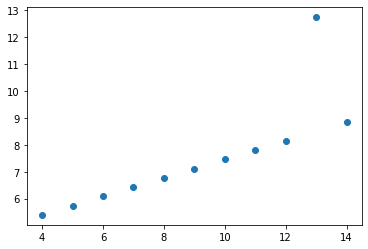

In [10]:
plt.plot(d_set3['x'], d_set3['y'], 'o')

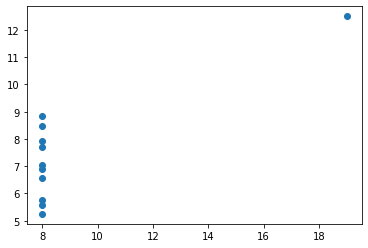

In [11]:
plt.plot(d_set4['x'], d_set4['y'], 'o')

## Subplotting

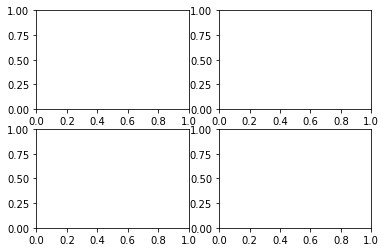

In [12]:
fig = plt.figure()

# 2 rows , 2 cols, plot loc 1
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

In [13]:
axes1.plot(d_set1['x'], d_set1['y'], 'o')
axes2.plot(d_set2['x'], d_set2['y'], 'o')
axes3.plot(d_set3['x'], d_set3['y'], 'o')
axes4.plot(d_set4['x'], d_set4['y'], 'o')

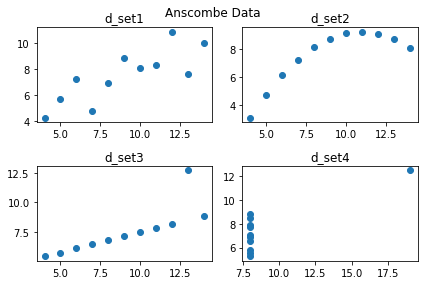

In [14]:
axes1.set_title("d_set1")
axes2.set_title("d_set2")
axes3.set_title("d_set3")
axes4.set_title("d_set4")

fig.suptitle("Anscombe Data")

fig.tight_layout()
fig

## Statistical Graphics using Matplotlib

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Univariate

#### histogram

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


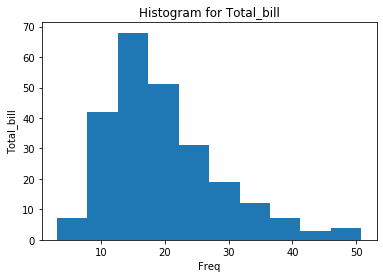

In [16]:
uni_fig = plt.figure()

axes1 = uni_fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)

axes1.set_title('Histogram for Total_bill')
axes1.set_xlabel('Freq')
axes1.set_ylabel('Total_bill')
uni_fig.show()

### Bivariate

#### Scatter plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


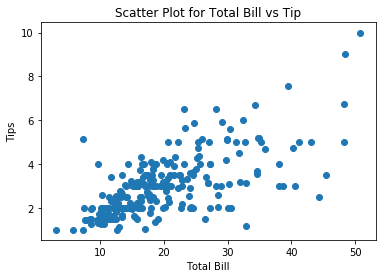

In [17]:
scatter_plt = plt.figure()

axes2 = scatter_plt.add_subplot(1,1,1)
axes2.scatter(tips['total_bill'], tips['tip'])

axes2.set_title('Scatter Plot for Total Bill vs Tip')
axes2.set_xlabel('Total Bill')
axes2.set_ylabel('Tips')

scatter_plt.show()

#### Box plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


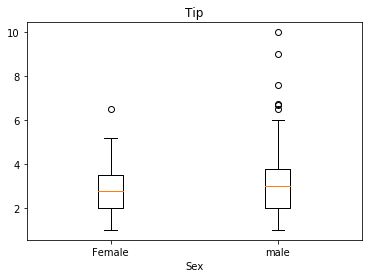

In [18]:
box_plot = plt.figure()

axes3 = box_plot.add_subplot(1,1,1)

axes3.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex']=='Male']['tip']], labels=['Female','male'])

axes3.set_title("Box plot of Tips vs Sex")
axes3.set_xlabel('Sex')
axes3.set_title('Tip')

box_plot.show()

### Multivariate Data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


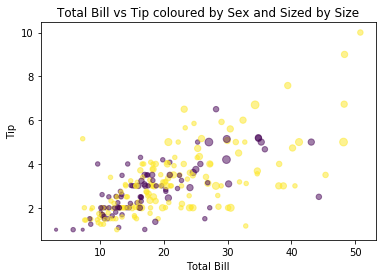

In [19]:
def rename_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(rename_sex)

scatter_plt = plt.figure()

axes4 = scatter_plt.add_subplot(1,1,1)
axes4.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5
)

axes4.set_title("Total Bill vs Tip coloured by Sex and Sized by Size")

axes4.set_xlabel('Total Bill')
axes4.set_ylabel('Tip')

scatter_plt.show()

## Using Seaborn

### Univariate

#### Histogram

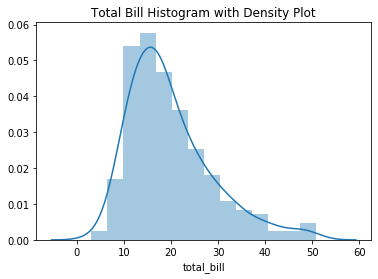

In [20]:
hist, ax = plt.subplots()

ax = sns.distplot(tips['total_bill'])

ax.set_title('Total Bill Histogram with Density Plot')

plt.show()

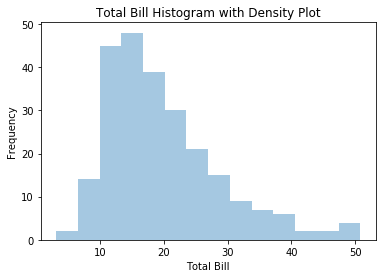

In [21]:
hist, ax = plt.subplots()

ax = sns.distplot(tips['total_bill'], kde=False)

ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

plt.show()

#### Density Plot (Kernel Density Estimation)

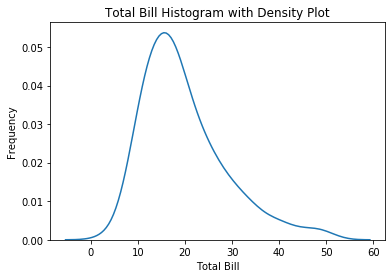

In [22]:
dens, ax = plt.subplots()

ax = sns.distplot(tips['total_bill'], hist=False)

ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

plt.show()

#### Rug Plot

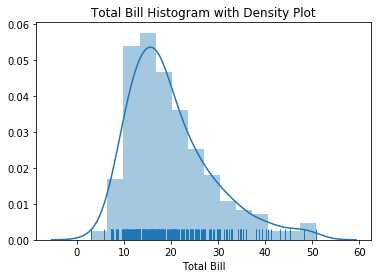

In [23]:
hist_dens_rug, ax = plt.subplots()

ax = sns.distplot(tips['total_bill'], rug=True)

ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')

plt.show()

#### Count Plot (Bar Plot)

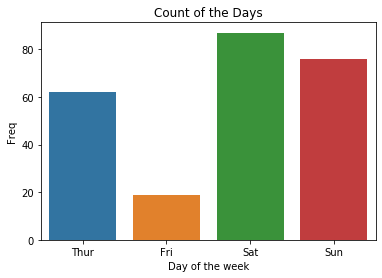

In [24]:
count, ax = plt.subplots()

ax = sns.countplot('day', data=tips)
ax.set_title('Count of the Days')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Freq')
plt.show()

### Bivariate Data

#### Scatterplot

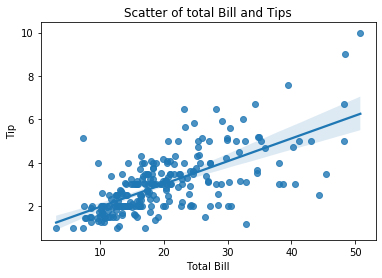

In [25]:
scatter, ax = plt.subplots()
ax =sns.regplot(x='total_bill', y='tip', data=tips)

ax.set_title('Scatter of total Bill and Tips')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()


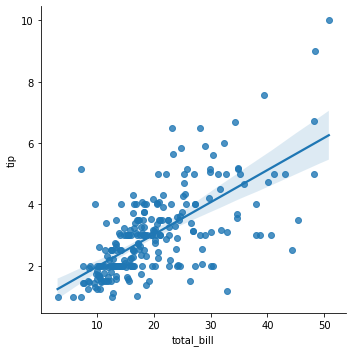

In [26]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

#### joint plot

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

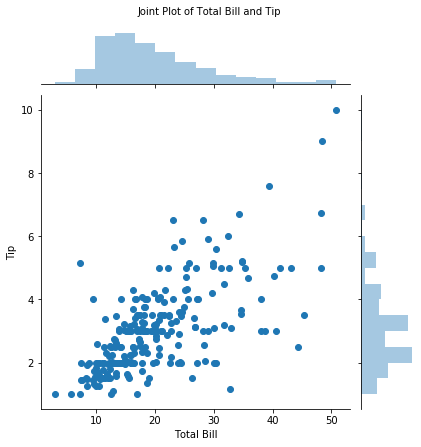

In [27]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)

joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### Hexbin Plot

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

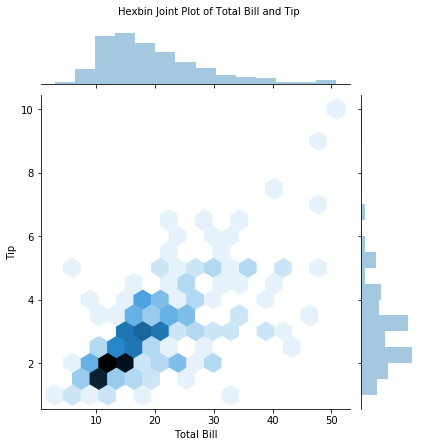

In [28]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### 2D Density Plot

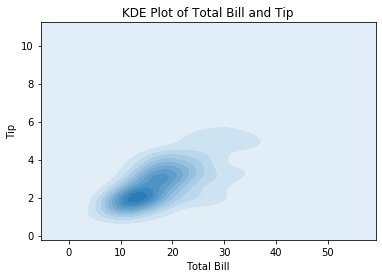

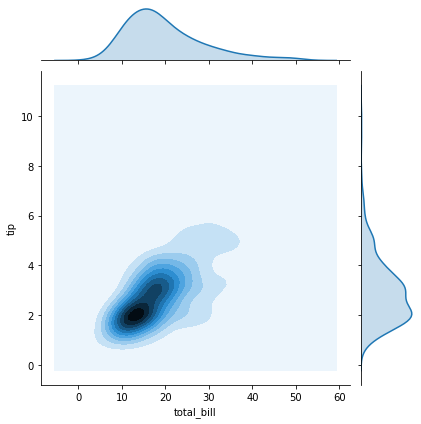

In [29]:
kde, ax = plt.subplots()

ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)

ax.set_title('KDE Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

#### Bar plot

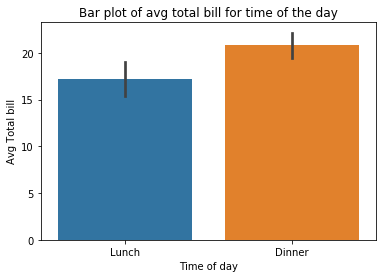

In [30]:
bar, ax = plt.subplots()

ax = sns.barplot(x='time', y='total_bill', data=tips)

ax.set_title('Bar plot of avg total bill for time of the day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Avg Total bill')

plt.show()

#### Box plot

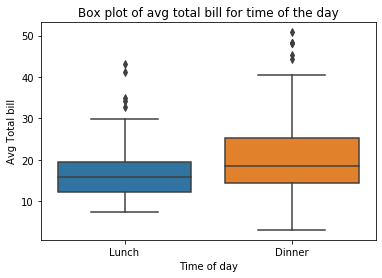

In [32]:
box, ax = plt.subplots()

ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Box plot of avg total bill for time of the day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Avg Total bill')

plt.show()

#### Violin Plot

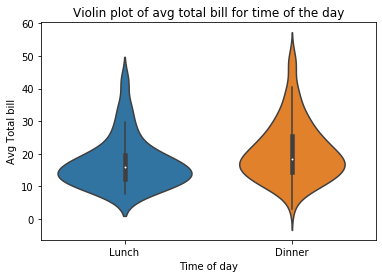

In [33]:
violin, ax = plt.subplots()

ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of avg total bill for time of the day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Avg Total bill')

plt.show()

#### Pairwise Relationships

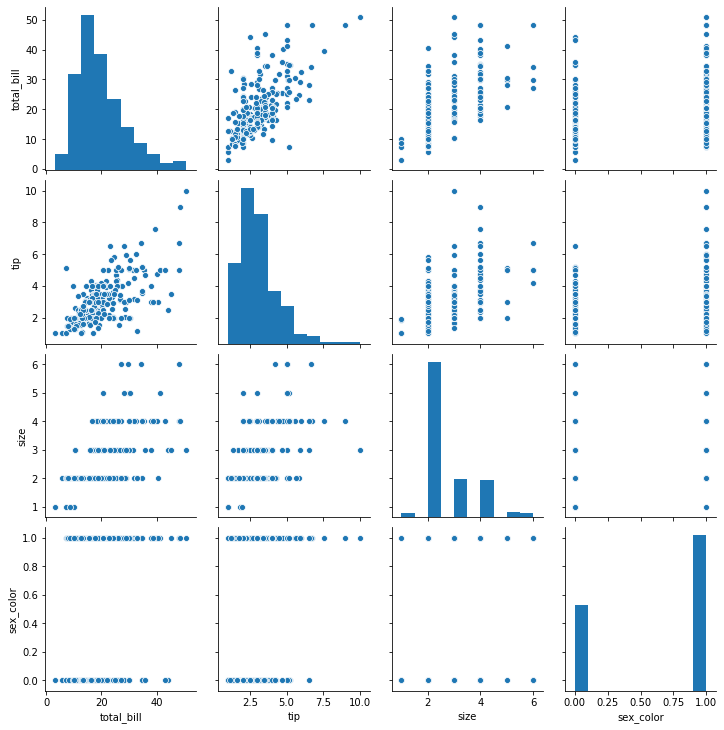

In [35]:
fig = sns.pairplot(tips)

In [36]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


#### pair grid

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


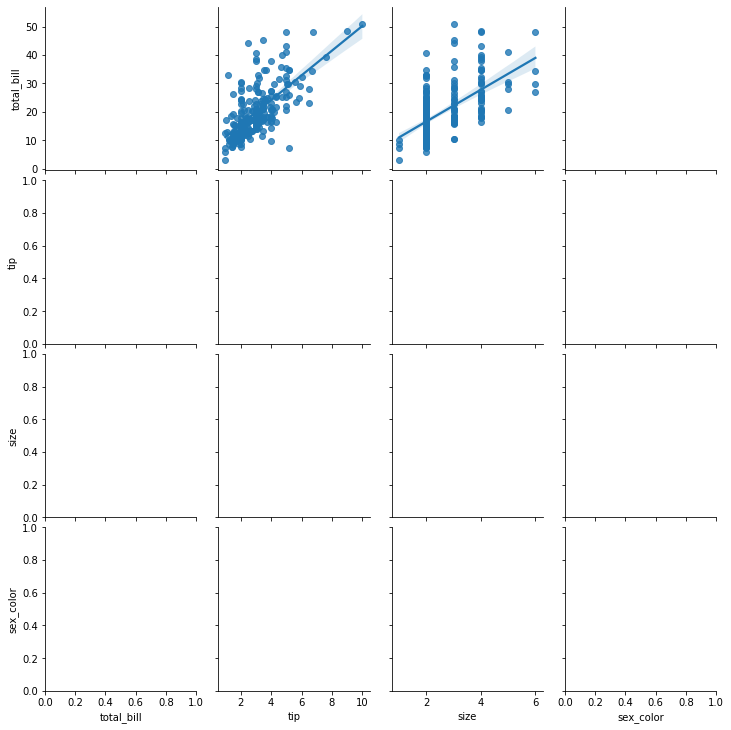

In [39]:
pair_grid = sns.PairGrid(tips)

pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()

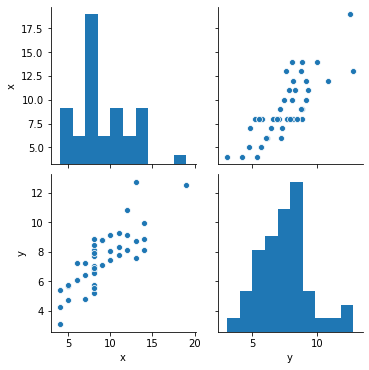

In [40]:
fig = sns.pairplot(anscombe)

### Multivariate Data

#### Coloring Violin plot

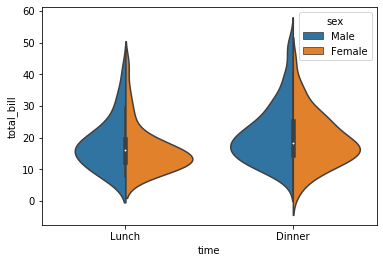

In [42]:
viol, ax= plt.subplots()

ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

plt.show()

#### lmplot

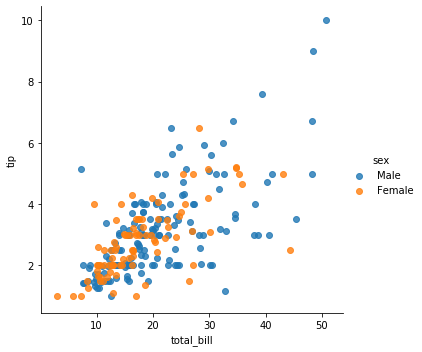

In [44]:

scatter = sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, fit_reg=False)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


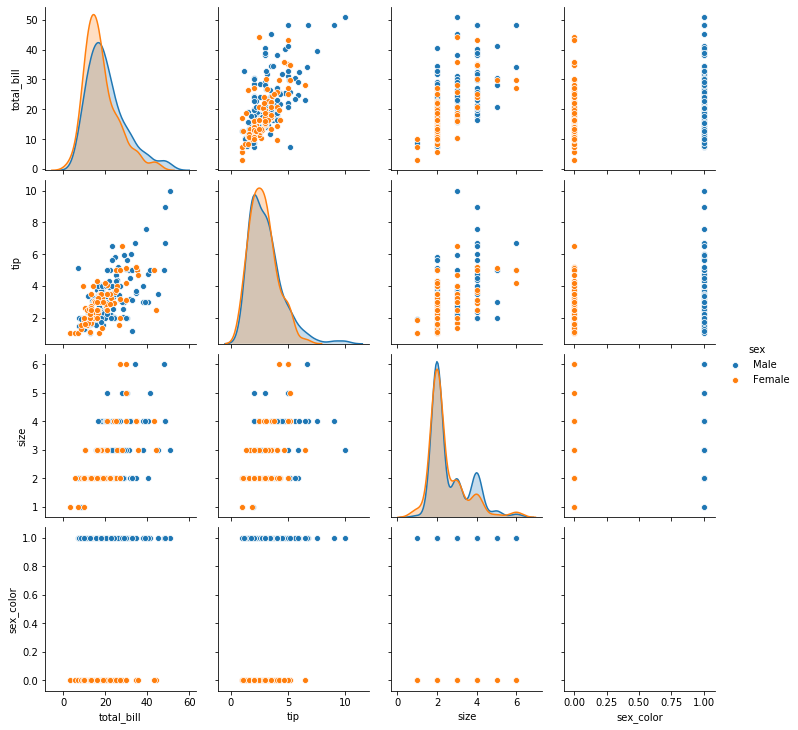

In [45]:
fig = sns.pairplot(tips, hue='sex')

#### Size and Shape